## _Bayesian Framework & Probability Distribution_

In [5]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats as stats

In [2]:
# Example : coin flip

In [6]:
figsize(11, 9)

In [4]:
dist = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


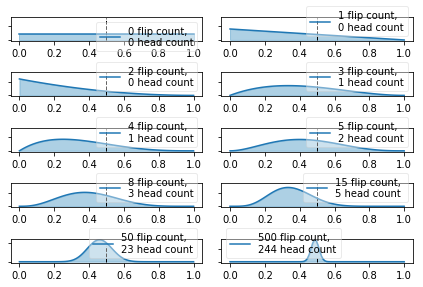

In [9]:
x = np.linspace(0, 1, 100)

for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials) / 2, 2, k + 1)
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label="%d flip count, \n%d head count" % (N, heads))
    
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)
    
    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
plt.tight_layout()

### _Poisson-distribution_

In [6]:
figsize(12.5, 4)

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


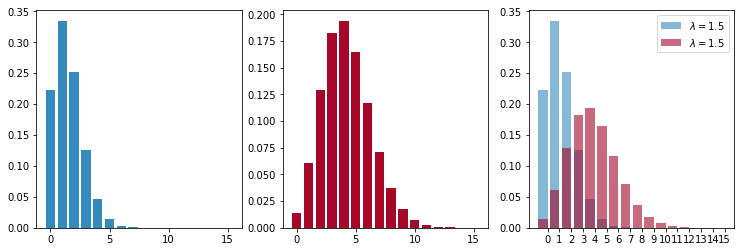

In [7]:
a = np.arange(16)
poi = stats.poisson
lambda_ = [1.5, 4.25]
colours = ["#348ABD", "#A60628"]

plt.subplot(1, 3, 1)
plt.bar(a, poi.pmf(a, lambda_[0]), color=colours[0])

plt.subplot(1, 3, 2)
plt.bar(a, poi.pmf(a, lambda_[1]), color=colours[1])

plt.subplot(1, 3, 3)
plt.bar(a, poi.pmf(a, lambda_[0]), color=colours[0], label="$\lambda = %.1f$" % lambda_[0], \
        alpha=0.60)
plt.bar(a, poi.pmf(a, lambda_[1]), color=colours[1], label="$\lambda = %.1f$" % lambda_[0], \
        alpha=0.60)

plt.xticks(a + 0.4, a)
plt.legend()

### _exponential distribution_

In [ ]:
a = np.linspace(0, 4, 100)
expo = stats.expon
lambda_ = [0.5, 1]

In [ ]:
for l, c in zip(lambda_, colours):
    plt.plot(a, expo.pdf(a, scale=1. / l))


## _Bayesian Inference Using Computer_

- Example : Action Inference using text messages.

In [ ]:
# 데이터 가져오기

In [7]:
figsize(12.5, 3.5)

count_data = np.loadtxt(r"01_txtdata.csv")
n_count_data = len(count_data)
n_count_data, count_data

(74, array([ 13.,  24.,   8.,  24.,   7.,  35.,  14.,  11.,  15.,  11.,  22.,
         22.,  11.,  57.,  11.,  19.,  29.,   6.,  19.,  12.,  22.,  12.,
         18.,  72.,  32.,   9.,   7.,  13.,  19.,  23.,  27.,  20.,   6.,
         17.,  13.,  10.,  14.,   6.,  16.,  15.,   7.,   2.,  15.,  15.,
         19.,  70.,  49.,   7.,  53.,  22.,  21.,  31.,  19.,  11.,  18.,
         20.,  12.,  35.,  17.,  23.,  17.,   4.,   2.,  31.,  30.,  13.,
         27.,   0.,  39.,  37.,   5.,  14.,  13.,  22.]))

(0, 74)

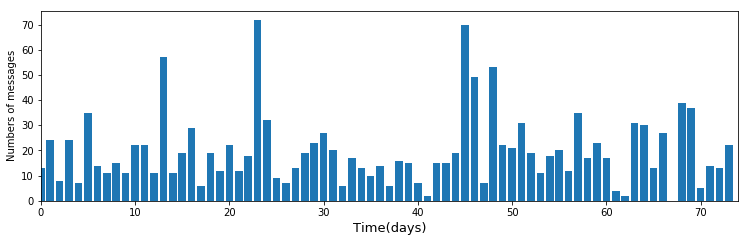

In [8]:
plt.bar(np.arange(n_count_data), count_data)
plt.xlabel("Time(days)", fontsize=13)
plt.ylabel("Numbers of messages")
plt.xlim(0, n_count_data)

In [10]:
# 모수의 분포 구하기

import pymc as pm

In [45]:
alpha = 1.0/count_data.mean()

lambda_1 = pm.Exponential("lambda_1", alpha)
lambda_2 = pm.Exponential("lambda_2", alpha)

tau = pm.DiscreteUniform("tau", lower=0, upper=n_count_data)

In [46]:
print("Random output:", tau.random(), tau.random(), tau.random())

Random output: 19 7 44


In [47]:
@pm.deterministic
def lambda_(tau=tau, lambda_1=lambda_1, lambda_2=lambda_2):
    out = np.zeros(n_count_data)
    out[:tau] = lambda_1
    out[tau:] = lambda_2
    return out

In [48]:
observation = pm.Poisson("obs", lambda_, value=count_data, observed=True)

model = pm.Model([observation, lambda_1, lambda_2, tau])

In [49]:
mcmc = pm.MCMC(model)
mcmc.sample(40000, 10000)

 [-----------------100%-----------------] 40000 of 40000 complete in 6.5 sec

In [50]:
np.mean(lambda_1_samples)

20.096869701545085

In [51]:
lambda_1_samples = mcmc.trace('lambda_1')[:]
lambda_2_samples = mcmc.trace('lambda_2')[:]
tau_samples = mcmc.trace('tau')[:]

/Users/quartz/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/quartz/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(35, 54)

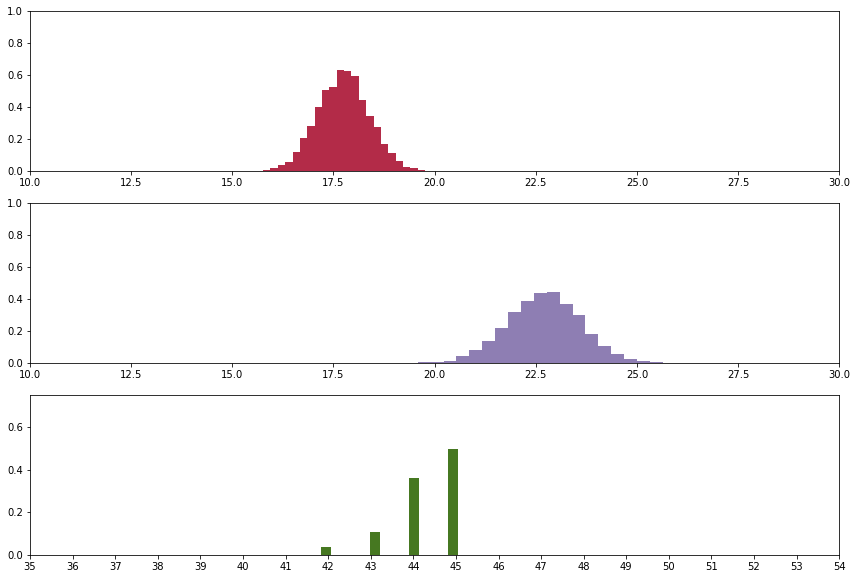

In [52]:
figsize(14.5, 10)

ax = plt.subplot(311)
ax.set_autoscaley_on(False)

plt.hist(lambda_1_samples, histtype='stepfilled', bins=30, alpha=0.85, \
         label="$\lambda_1$'s posterior pd'", color="#A60628", normed=True)
plt.xlim([10, 30])

ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=30, alpha=0.85, \
         label="$\lambda_2$'s posterior pd'", color="#7A68A6", normed=True,)
plt.xlim([10, 30])

plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, bins=n_count_data, alpha=1, color="#467821", weights=w, rwidth=2.)
plt.xticks(np.arange(n_count_data))
plt.ylim([0, .75])
plt.xlim([35, len(count_data) - 20])

<BarContainer object of 74 artists>

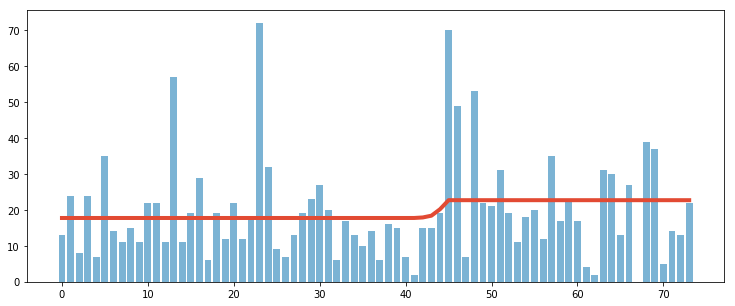

In [53]:
# 해석

figsize(12.5, 5)

N = tau_samples.shape[0]
expected_texts_per_day = np.zeros(n_count_data)

for day in range(0, n_count_data):
    ix = day < tau_samples
    expected_texts_per_day[day] = (lambda_1_samples[ix].sum() + lambda_2_samples[~ix].sum()) / N
    
plt.plot(range(n_count_data), expected_texts_per_day, lw=4, color="#E24A33", \
         label="message's expectation")
plt.bar(np.arange(len(count_data)), count_data, color="#348ABD", alpha=0.65)

## *부록*

- 두 람다가 정말 다른지 통계적으로 알 수 있을까?
- 변환점 두 개로 확장하기

In [ ]:
# 두 람다가 정말 다른지 통계적으로 알 수 있을까?

In [55]:
print((lambda_1_samples < lambda_2_samples).sum())

29975


In [56]:
print(lambda_1_samples.shape[0], lambda_2_samples.shape[0])

30000 30000


In [57]:
print((lambda_1_samples < lambda_2_samples).mean())

0.999166666667


In [58]:
for d in [1,2,3,4,5,6,7,8,9,10]:
    v = (abs(lambda_1_samples - lambda_2_samples) >= d).mean()
    print("Larger than %d? %.2f" % (d,v))

Larger than 1? 1.00
Larger than 2? 1.00
Larger than 3? 0.96
Larger than 4? 0.81
Larger than 5? 0.49
Larger than 6? 0.17
Larger than 7? 0.03
Larger than 8? 0.00
Larger than 9? 0.00
Larger than 10? 0.00
